# Description

In [1]:
# For some features, no description is available, so they may be dummy features
# (also called 1-hot encoded variables, binary indicators,...), numerical
# features, etc., but not categorical ones. For the following features we
# provide additional information:

In [2]:
# school holiday
  # 0 = no school holiday
  # 1 = school holiday only in county #1
  # 2 = school holiday only in county #2
  # 3 = school holiday both in county #1 and in county #2

In [3]:
# bank holiday
  # 0 = no bank holiday
  # 1 = bank holiday only in county #1
  # 2 = bank holiday only in county #2
  # 3 = bank holiday both in county #1 and in county #2

In [4]:
# Additionally, daily weather data for the location of the leisure
# attraction is provided.

In [5]:
# Setting plot size for jupyter notebook
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

# Loading Data and Data Exploration

In [6]:
library(tidyverse)

train <- as.tibble(read.csv("data_train.csv"))
test <- as.tibble(read.csv("data_test.csv"))
weather <- as.tibble(read.csv("weather.csv"))
sample_submission <- as.tibble(read.csv("sample_submission.csv"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message in file(file, "rt"):
“cannot open file 'sample_submission.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
summary(train) # nothing unusual here

# UNIQUE VALUES
unique(train[12]) # 0 - no information
unique(train[13]) # 0 - no information

In [ ]:
range(train[15]) # values between (142, 3761)

In [ ]:
# Dropping unnecessary columns
train <- train[-c(12, 13)]
length(train)

test <- test[-c(12, 13)]
length(test)

In [ ]:
# Checking type of date
library(lubridate)
is.Date(train[1])

In [7]:
# Converting to date
train[1] <- as.Date(train[[1]], "%Y-%m-%d")
train[1,1] # earliest date: 2005-03-20
train[nrow(train), 1] # latest date: 2009-12-31

test[1] <- as.Date(test[[1]], "%Y-%m-%d")
test[1,1]
test[nrow(test), 1]

date
2005-03-20


date
2009-12-31


date
2010-01-01


date
2010-12-31


In [8]:
# Adding month row:
library(lubridate)

train <- as.tibble(cbind(train, month = as.factor(month(as.POSIXlt(train[[1]])))))
test <- as.tibble(cbind(test, month = as.factor(month(as.POSIXlt(test[[1]])))))


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [9]:
# Adding weekday row:
train <- as.tibble(cbind(train, wday = as.factor(weekdays(as.POSIXlt(train[[1]])))))
test <- as.tibble(cbind(test, wday = as.factor(weekdays(as.POSIXlt(test[[1]])))))

In [10]:
# Checking for outliers in visitor number and seasonal effects
ggplot(data=train, aes(x=date, y=label)) +
  geom_point() +
  theme(legend.position = "none") +
  geom_rect(aes(ymin=0, ymax=4000, xmin=train[1],xmax=train[nrow(train), 1],
                fill=month), alpha =0.007) +
  scale_fill_manual(name = "Legende", 
                     values = c("blue", "blue", "green", "green", "green",
                                "yellow", "yellow", "yellow", "brown", "brown", "brown", "blue")) +
  labs(title="Seasonality of visitor numbers",
       y="Visitors", x="Time", caption="blue = winter, yellow = summer") +
  geom_point()

# Weather Data

In [11]:
weather

date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
2005-03-20,69,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,58,13.2,6.2,-0.3,0.0,0,11.3,9.7
2005-03-22,52,18.0,10.6,3.0,3.3,0,8.6,9.2
2005-03-23,79,17.6,12.5,7.2,0.0,0,8.4,8.2
2005-03-24,71,20.1,13.3,6.4,4.3,0,7.9,8.6
2005-03-25,89,15.5,11.6,9.1,2.2,0,1.6,8.5
2005-03-26,91,14.0,10.0,6.6,0.0,0,3.2,6.9
2005-03-27,86,15.0,10.3,6.6,0.0,0,3.5,8.5
2005-03-28,89,13.5,10.5,8.7,2.0,0,0.5,6.6
2005-03-29,91,13.3,10.2,8.0,0.0,0,0.3,8.4


In [12]:
summary(weather) # Lots of NAs!

         date       air_humidity    air_temperature_daily_max
 2005-03-20:   1   Min.   : 38.00   Min.   :-9.90            
 2005-03-21:   1   1st Qu.: 72.00   1st Qu.: 8.60            
 2005-03-22:   1   Median : 81.00   Median :15.20            
 2005-03-23:   1   Mean   : 79.22   Mean   :14.77            
 2005-03-24:   1   3rd Qu.: 89.00   3rd Qu.:20.93            
 2005-03-25:   1   Max.   :100.00   Max.   :36.90            
 (Other)   :2100   NA's   :38       NA's   :42               
 air_temperature_daily_mean air_temperature_daily_min precipitation    
 Min.   :-12.10             Min.   :-14.700           Min.   :  0.000  
 1st Qu.:  5.80             1st Qu.:  2.600           1st Qu.:  0.000  
 Median : 11.10             Median :  6.800           Median :  0.200  
 Mean   : 10.58             Mean   :  6.463           Mean   :  2.407  
 3rd Qu.: 15.80             3rd Qu.: 11.000           3rd Qu.:  2.800  
 Max.   : 28.00             Max.   : 20.000           Max.   :131.100  


In [13]:
# Maybe drop unnecessary columns: wind_Speed_max
# weather <- weather[ , -which(names(weather) %in% c("wind_speed_max"))]

In [14]:
# Train and Weather
nrow(train) == nrow(weather)

[1] FALSE

In [15]:
# We need to join train and weather on the Day for it to be useful
weather[1] <- as.Date(weather[[1]], "%Y-%m-%d") # convert to date

# Mean Replacement

In [16]:
# Creating month variable in the weather df for grouping
weather <- as.tibble(cbind(weather, month = as.factor(month(as.POSIXlt(weather[[1]])))))

weather <- weather %>%  group_by(month) %>%
  mutate_all(funs(ifelse(is.na(.), mean(., na.rm = TRUE),.)))

In [17]:
# dropping the month variable again, since we would duplicate it when merging
weather <- weather[ , -which(names(weather) %in% c("month"))]

In [18]:
# JOIN DATAFRAMES
wtrain <- merge(train, weather, by="date")
wtrain

wtest<- merge(test, weather, by="date")
wtest

date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,month,wday,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Sunday,69,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Monday,58,13.2,6.2,-0.3,0.0,0,11.3,9.7
2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Tuesday,52,18.0,10.6,3.0,3.3,0,8.6,9.2
2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Wednesday,79,17.6,12.5,7.2,0.0,0,8.4,8.2
2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Thursday,71,20.1,13.3,6.4,4.3,0,7.9,8.6
2005-03-25,3,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Friday,89,15.5,11.6,9.1,2.2,0,1.6,8.5
2005-03-26,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Saturday,91,14.0,10.0,6.6,0.0,0,3.2,6.9
2005-03-27,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Sunday,86,15.0,10.3,6.6,0.0,0,3.5,8.5
2005-03-28,3,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Monday,89,13.5,10.5,8.7,2.0,0,0.5,6.6
2005-03-29,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Tuesday,91,13.3,10.2,8.0,0.0,0,0.3,8.4


date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,month,wday,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
2010-01-01,3,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Friday,91,-1.5,-2.1,-3.3,0.2,10,0.0,7.4
2010-01-02,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Saturday,89,-2.0,-3.7,-5.3,7.5,9,0.0,5.9
2010-01-03,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Sunday,91,-3.5,-4.6,-5.6,0.2,17,0.3,6.5
2010-01-04,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Monday,89,-3.3,-4.9,-7.4,0.3,16,1.0,9.1
2010-01-05,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Tuesday,90,-0.7,-1.9,-3.3,1.1,15,0.0,8.2
2010-01-06,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Wednesday,88,-2.0,-3.5,-5.2,0.0,14,0.3,3.9
2010-01-07,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Thursday,89,-1.6,-2.9,-4.1,0.4,14,0.0,4.4
2010-01-08,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Friday,91,-2.5,-4.6,-7.7,0.5,13,0.0,11.7
2010-01-09,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Saturday,89,-0.5,-2.0,-4.0,4.6,11,0.0,13.9
2010-01-10,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,Sunday,88,-0.6,-1.6,-1.9,1.5,15,0.0,10.8


In [19]:
# Omitting all rows with NAs in the train set
wtrain <- as.tibble(na.omit(wtrain))
wtrain

date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,month,wday,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Sunday,69,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Monday,58,13.2,6.2,-0.3,0.0,0,11.3,9.7
2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Tuesday,52,18.0,10.6,3.0,3.3,0,8.6,9.2
2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Wednesday,79,17.6,12.5,7.2,0.0,0,8.4,8.2
2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Thursday,71,20.1,13.3,6.4,4.3,0,7.9,8.6
2005-03-25,3,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Friday,89,15.5,11.6,9.1,2.2,0,1.6,8.5
2005-03-26,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Saturday,91,14.0,10.0,6.6,0.0,0,3.2,6.9
2005-03-27,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Sunday,86,15.0,10.3,6.6,0.0,0,3.5,8.5
2005-03-28,3,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Monday,89,13.5,10.5,8.7,2.0,0,0.5,6.6
2005-03-29,0,0,0,0,3.2,6.7,1.7,3.7,0,...,3,Tuesday,91,13.3,10.2,8.0,0.0,0,0.3,8.4


# One-Hot-Encoding

In [20]:
# school holiday and bank holiday need to be encoded using One Hot Encoding

# We check the values again
unique(wtrain$school_holiday)
unique(wtrain$bank_holiday)

unique(wtest$school_holiday)
unique(wtest$bank_holiday)

[1] 0 3 1 2

[1] 0 3 2

[1] 3 0 1 2

[1] 3 0 2

In [21]:
# First, we create the encoded matrices

# For train

school_f <- as.factor(wtrain$school_holiday)
bank_f <- as.factor(wtrain$bank_holiday)



oh_school <- as.tibble(model.matrix(~ school_f))
colnames(oh_school) <- c("school_holiday_0", "school_holiday_1", "school_holiday_2", "school_holiday_3")

oh_bank <- as.tibble(model.matrix(~ bank_f))

oh_bank <- cbind(oh_bank)
colnames(oh_bank) <- c("bank_holiday_0", "bank_holiday_2", "bank_holiday_3")

In [22]:
# For test

school_ftst <- as.factor(wtest$school_holiday)
bank_ftst <- as.factor(wtest$bank_holiday)

oh_schooltst <- as.tibble(model.matrix(~ school_ftst))
colnames(oh_schooltst) <- c("school_holiday_0", "school_holiday_1", "school_holiday_2", "school_holiday_3")

oh_banktst <- as.tibble(model.matrix(~ bank_ftst))
colnames(oh_banktst) <- c("bank_holiday_0", "bank_holiday_2", "bank_holiday_3")

In [23]:
# Next, we drop the original columns and dates from the df

wtrain <- wtrain[ , -which(names(wtrain) %in% c("bank_holiday", "school_holiday", "date"))]

wtest <- wtest[, -which(names(wtest) %in% c("bank_holiday", "school_holiday", "date"))]

In [24]:
# And finally add the OH-encoded columns to get our df ready for modeling

mtrain <- as.tibble(cbind(wtrain, oh_school, oh_bank))

In [25]:
# Adding empty label for mtest

mtest <- as.tibble(cbind(wtest, oh_schooltst, oh_banktst, label = 0))

# Modeling: Random Forest

In [26]:
# Preparing data

library(modelr)

# From the dataframe mtrain we get our predictors and our label

X_train <- as.tibble(mtrain[ , -which(names(mtrain) %in% c("label"))])
y_train <- as.tibble(mtrain$label)

y_test <- as.tibble(mtest)

In [27]:
# RANDOM FOREST

library(randomForest)

rf <- randomForest(mtrain$label ~ ., data=mtrain, importance=TRUE)

rf_pred <- predict(rf, y_test)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [34]:
# Accuracy decrease
varImpPlot(rf, type = 1, main ="Accuracy Decrease")

In [35]:
# Gini decrease
varImpPlot(rf, type = 2, main = "Gini Decrease") # shows which variables make splitting rules

# Modeling: Boosting

In [39]:
library(xgboost)

# First we set up the folds and the parameter list for the Grid search:

X_train_xgb <- data.matrix(cbind(X_train, label = 0))
y_train_xgb <- y_train[[1]]

N <- nrow(X_train_xgb)
fold_number <- sample(1:5, N, replace = TRUE)
params <- data.frame(eta = rep(c(.05, .1, .3, .5, .7), 5),
                     max_depth = rep(c(2, 3, 6, 12, 24), rep(5,5))
                     )

ERROR: Error in library(xgboost): there is no package called ‘xgboost’


In [42]:
# Now we apply the preceding algorithm to compute the error for each model and each fold
# using five folds

error <- matrix(0, nrow = 25, ncol =5)
for(i in 1:nrow(params)){
  for (k in 1:5){
    fold_idx <- (1:N)[fold_number == k]
    xgb <- xgboost(data = X_train_xgb, label = y_train_xgb,
                   params = list(eta = params[i, "eta"],
                                 max_depth = params[i, "max_depth"]),
                   objective = "reg:linear", nrounds = 100, verbose = 0)
    pred <- predict(xgb, X_train_xgb)
    error[i, k] <- mean(y_train_xgb - pred)
  }
}

ERROR: Error in nrow(params): object 'params' not found


In [43]:
# The errors are stored as a matrix with the models along the rows and folds along
# the columns.

avg_error <- 100 * rowMeans(error)
xgb_mdls_errors <- as.tibble(cbind(params, avg_error))
xgb_mdls_errors_abs <- as.tibble(cbind(params, avg_error_abs = abs(avg_error)))

ERROR: Error in cbind(params, avg_error): object 'params' not found


In [44]:
# We get the smallest error for eta = 0.5 and max_depth = 12

xgb_winner <- arrange(xgb_mdls_errors_abs, avg_error_abs)[1,]
xgb_winner

ERROR: Error in arrange(xgb_mdls_errors_abs, avg_error_abs): object 'xgb_mdls_errors_abs' not found


In [45]:
# Therefore we now build this model and compute the rmse.

xgb_finalmodel <- xgboost(data = X_train_xgb, label = y_train_xgb,
                          objective = "reg:linear", nrounds = 100,
                          eta = xgb_winner$eta, xgb_winner$max_depth)

ERROR: Error in xgboost(data = X_train_xgb, label = y_train_xgb, objective = "reg:linear", : could not find function "xgboost"


In [46]:
# Transform test to data.matrix, so that we can compare the models.

y_test_xgb <- data.matrix(y_test)

xgb_pred <- predict(xgb_finalmodel, y_test_xgb)
xgb_submit <- as.tibble(cbind(test$date, xgb_pred))

write.csv(xgb_submit, file = "xgb_submit.csv", row.names = FALSE)

ERROR: Error in predict(xgb_finalmodel, y_test_xgb): object 'xgb_finalmodel' not found


# Modeling: Deep Neural Network using h2o

In [48]:
install.packages("h2o")
install.packages("caret")

library(h2o)
library(caret)

h2o.init()

h2o_train <- as.h2o(mtrain)
h2o_test <- as.h2o(y_test)

h2o_model <- h2o.deeplearning(x = setdiff(names(mtrain), c("label")),
                              y = "label",
                              training_frame = h2o_train,
                              standardize = TRUE,         # standardize data
                              hidden = c(100, 100, 100, 100),       # 4 layers of 100 nodes each
                              rate = 0.01,                # learning rate
                              epochs = 200,               # iterations/runs over data
                              seed = 1234                 # reproducability seed
                              )

h2o_pred <- as.data.frame(h2o.predict(h2o_model, h2o_test))

print(h2o_cm <- confusionMatrix(h2o_pred$predict, test$label))

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
also installing the dependencies ‘geometry’, ‘ddalpha’, ‘recipes’

Warning message in install.packages("caret"):
“installation of package ‘ddalpha’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:lubridate’:

    day, hour, month, week,

ERROR: Error in library(caret): there is no package called ‘caret’


# Combining the models

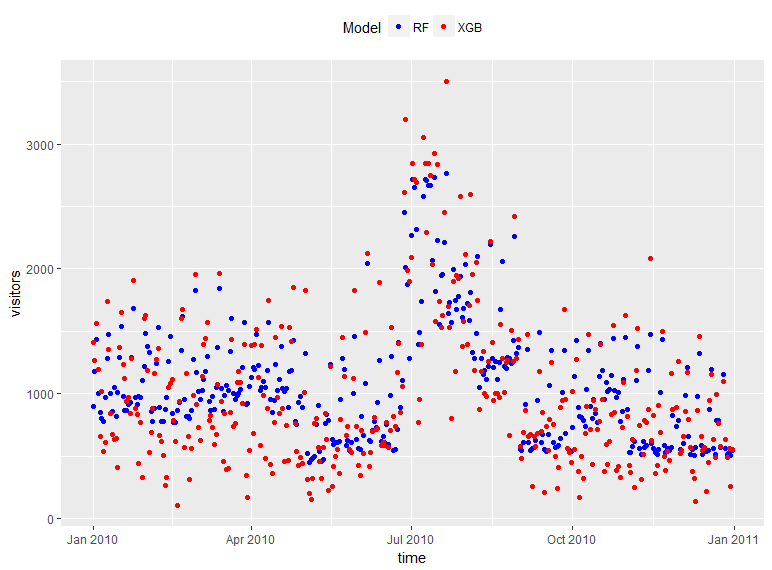

In [55]:
# Looking at predictions of RF and XGB

library("IRdisplay")
display_png(file="models.png")

In [1]:
library(matrixStats)

pred_mx <- as.matrix(cbind(rf_pred, xgb_pred, h2o_pred))

weighted_mix <- rowWeightedMeans(pred_mx, w = c(1, 0.35, 0.45), rows = NULL)

weighted_submit <- as.tibble(cbind(date = test$date, visitors = weighted_mix))

write.csv(weighted_submit, file = "weighted_submit.csv", row.names = FALSE)

ERROR: Error in library(matrixStats): there is no package called ‘matrixStats’
